In [1]:
#try matplotlib widget if it works
%matplotlib inline

#Load modules (this is how I do it)
#!bash

import numpy as np
import matplotlib.pyplot as plt

from helita.sim import rh15d
from helita.vis import rh15d_vis
from IPython.display import HTML, display, set_matplotlib_formats

set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(7, 7 / 1.75)) # Larger figure sizes
plt.rc('font', size=12)

Make new wavelength file on range that accurately samples Ca $\textrm{II}$ H line.

In [2]:
"""
Uncomment to make a new wavelength file
""";
#rh15d.make_wave_file('new.wave', 392.8, 394.0, 0.001)

Wrote 1200 wavelengths to file.


Change wavetable in `keyword.input` to `new.wave` which we made in prevoious cell. Include all atoms in `atoms.input` and set CaII as active. Uncomment `kurucz.input` in `keyword.input`, and include `gf0400.10` in `kurucz.input`. Change the file `gf0400.10` so that it only includes wavelengths from i.e. 391 to 395 by deleting lines outside this range. Change `PRD_N_MAX_ITER` to 3 in `keyword.input`. Now we run **RH**.

In [4]:
"""
Uncomment to run RH
""";
!../rh15d_ray

Process    0: --- START task   1 [of 1], (xi,yi) = (  0,  0)
Process    0: *** END   task   1 iter, iterations =  25, CONVERGED
Process    0: --- START output
Process    0: *** END output
*** Job ending. Total 1 1-D columns: 1 converged, 0 did not converge, 0 crashed.
*** RH finished gracefully.


Now we can plot intensity

--- Read output/output_aux.hdf5 file.
--- Read output/output_indata.hdf5 file.
--- Read output/output_ray.hdf5 file.


/uio/hume/student-u09/meudnaes/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/uio/hume/student-u09/meudnaes/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


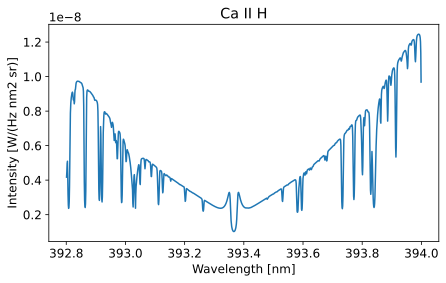

In [5]:
data = rh15d.Rh15dout('output/')
data.close()
wave = data.ray.wavelength
intensity = data.ray.intensity
indices = np.arange(len(wave))[(wave > 392.8) & (wave < 394)]

fig, ax = plt.subplots()
ax.plot(wave[indices], intensity[0,0,indices])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity [W/(Hz nm2 sr)]")
ax.set_title("Ca II H");

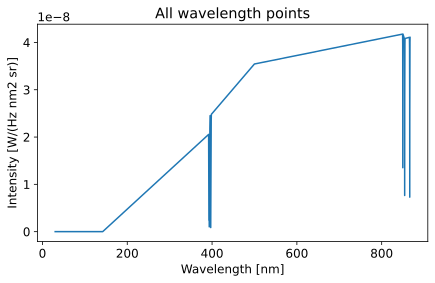

In [6]:
fig, ax = plt.subplots()
ax.plot(wave[:], intensity[0,0,:])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity [W/(Hz nm2 sr)]")
ax.set_title("All wavelength points");

### Line formation

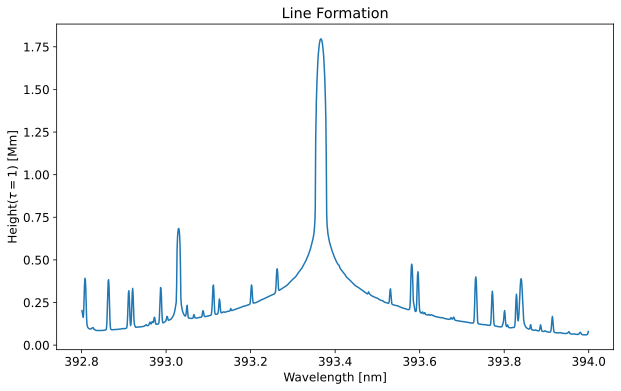

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(wave[indices], data.ray.tau_one_height[0, 0, indices]/1e6)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel(r"Height($\tau = 1$) [Mm]")
ax.set_title("Line Formation");